---
title: "analytcis model"
format: html
jupyter: python3
execute:
  echo: true
  warning: false
  error: true
toc: true
code-fold: true
---

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score


eda = pd.read_csv("data/eda_data.csv")


,COMPANY,LOCATION,POSTED,MIN_EDULEVELS_NAME,MAX_EDULEVELS_NAME,MIN_YEARS_EXPERIENCE,MAX_YEARS_EXPERIENCE,TITLE,SKILLS,SPECIALIZED_SKILLS,...,COMMON_SKILLS,SOFTWARE_SKILLS,SOC_2021_4_NAME,NAICS_2022_6,NAICS2_NAME,REMOTE_TYPE_NAME,SALARY,TITLE_NAME,SKILLS_NAME,SPECIALIZED_SKILLS_NAME
0,894731,"{\n ""lat"": 33.20763,\n ""lon"": -92.6662674\n}",6/2/24,Bachelor's degree,Master's degree,2,2,ET29C073C03D1F86B4,"[\n ""KS126DB6T061MHD7RTGQ"",\n ""KS126706DPFD3...","[\n ""KS126DB6T061MHD7RTGQ"",\n ""KS128006L3V0H...",...,"[\n ""KS126706DPFD3354M7YK"",\n ""KS1280B68GD79...","[\n ""KS440W865GC4VRBW6LJP"",\n ""KS13USA80NE38...",Data Scientists,441330.0,Retail Trade,[None],116250.0,Enterprise Analysts,"[\n ""Merchandising"",\n ""Mathematics"",\n ""Pr...","[\n ""Merchandising"",\n ""Predictive Modeling""..."
1,133098,"{\n ""lat"": 44.3106241,\n ""lon"": -69.7794897\n}",6/2/24,No Education Listed,Master's degree,3,3,ET21DDA63780A7DC09,"[\n ""KS122626T550SLQ7QZ1C"",\n ""KS123YJ6KVWC9...","[\n ""KS122626T550SLQ7QZ1C"",\n ""KS123YJ6KVWC9...",...,[],"[\n ""BGSBF3F508F7F46312E3"",\n ""ESEA839CED378...",Data Scientists,561320.0,Administrative and Support and Waste Managemen...,Remote,116250.0,Oracle Consultants,"[\n ""Procurement"",\n ""Financial Statements"",...","[\n ""Procurement"",\n ""Financial Statements"",..."
2,39063746,"{\n ""lat"": 32.7766642,\n ""lon"": -96.7969879\n}",6/2/24,Bachelor's degree,Master's degree,5,3,ET3037E0C947A02404,"[\n ""KS1218W78FGVPVP2KXPX"",\n ""ESF3939CE1F80...","[\n ""ESF3939CE1F80C10C327"",\n ""KS120GV6C72JM...",...,"[\n ""KS1218W78FGVPVP2KXPX"",\n ""BGS1ADAA36DB6...","[\n ""KS126HY6YLTB9R7XJC4Z""\n]",Data Scientists,524291.0,Finance and Insurance,[None],116250.0,Data Analysts,"[\n ""Management"",\n ""Exception Reporting"",\n...","[\n ""Exception Reporting"",\n ""Data Analysis""..."
3,37615159,"{\n ""lat"": 33.4483771,\n ""lon"": -112.0740373\n}",6/2/24,No Education Listed,Master's degree,3,3,ET2114E0404BA30075,"[\n ""KS123QX62QYTC4JF38H8"",\n ""KS7G6NP6R6L1H...","[\n ""KS123QX62QYTC4JF38H8"",\n ""KS441PQ64HT13...",...,"[\n ""KS7G6NP6R6L1H1SKFTSY"",\n ""KS1218W78FGVP...","[\n ""KS4409D76NW1S5LNCL18"",\n ""ESC7869CF7378...",Data Scientists,522110.0,Finance and Insurance,[None],116250.0,Management Analysts,"[\n ""Exit Strategies"",\n ""Reliability"",\n ""...","[\n ""Exit Strategies"",\n ""User Story"",\n ""H..."
4,0,"{\n ""lat"": 37.6392595,\n ""lon"": -120.9970014\n}",6/2/24,No Education Listed,Master's degree,5,3,ET0000000000000000,[],[],...,[],[],Data Scientists,999999.0,Unclassified Industry,[None],92500.0,Unclassified,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70170,37110815.0,"{\n ""lat"": 37.5407246,\n ""lon"": -77.4360481\n}",8/16/24,No Education Listed,Master's degree,3,3,ET3037E0C947A02404,"[\n ""KS1282N6NQMZ95M1HJ7L"",\n ""KS13USA80NE38...","[\n ""KS1282N6NQMZ95M1HJ7L"",\n ""KS13USA80NE38...",...,"[\n ""KS1259D6L30YYG3XR3VL"",\n ""KS122556LMQ82...","[\n ""KS13USA80NE38XJHA2TL"",\n ""KS125LS6N7WP4...",Data Scientists,541511.0,"Professional, Scientific, and Technical Services",[None],116250.0,Data Analysts,"[\n ""Scrum (Software Development)"",\n ""Power...","[\n ""Scrum (Software Development)"",\n ""Power..."
70171,59335641.0,"{\n ""lat"": 42.3764852,\n ""lon"": -71.2356113\n}",8/16/24,Bachelor's degree,Master's degree,10,3,ETA6C910340E81639B,"[\n ""KS4407N6CMTCYT0NYSVM"",\n ""ESF6784E14B18...","[\n ""KS4407N6CMTCYT0NYSVM"",\n ""ESF6784E14B18...",...,"[\n ""KS441VC75P5WHX8QL5SN"",\n ""ES20CECA4FF83...","[\n ""KS4407N6CMTCYT0NYSVM"",\n ""ESE9117F9A17C...",Data Scientists,513130.0,Information,[None],169275.0,Lead Enterprise Architects,"[\n ""Salesforce"",\n ""Programming Languages"",...","[\n ""Salesforce"",\n ""Programming Languages"",..."
70172,36997534.0,"{\n ""lat"": 42.732535,\n ""lon"": -84.5555347\n}",8/16/24,Bachelor's degree,Master's degree,5,3,ET3037E0C947A02404,"[\n ""KSQPGV2XZO8UMNCC49LK"",\n ""ES899BA440FA3...","[\n ""ES899BA440FA3441F22A"",\n "

In [12]:
features = eda[['SALARY', 'MAX_YEARS_EXPERIENCE', 'MIN_YEARS_EXPERIENCE']].copy()

for col in ['MAX_YEARS_EXPERIENCE', 'MIN_YEARS_EXPERIENCE', 'SALARY']:
    features[col] = pd.to_numeric(features[col], errors='coerce')

features = features.dropna()

scaler = StandardScaler()
X = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=688)
eda.loc[features.index, 'Cluster'] = kmeans.fit_predict(X)

true_labels = eda.loc[features.index, 'SOC_2021_4_NAME']
true_labels_encoded = LabelEncoder().fit_transform(true_labels)

ari = adjusted_rand_score(true_labels_encoded, eda.loc[features.index, 'Cluster'])
print("Adjusted Rand Index (using SOC):", ari)

Adjusted Rand Index (using SOC): 0.0


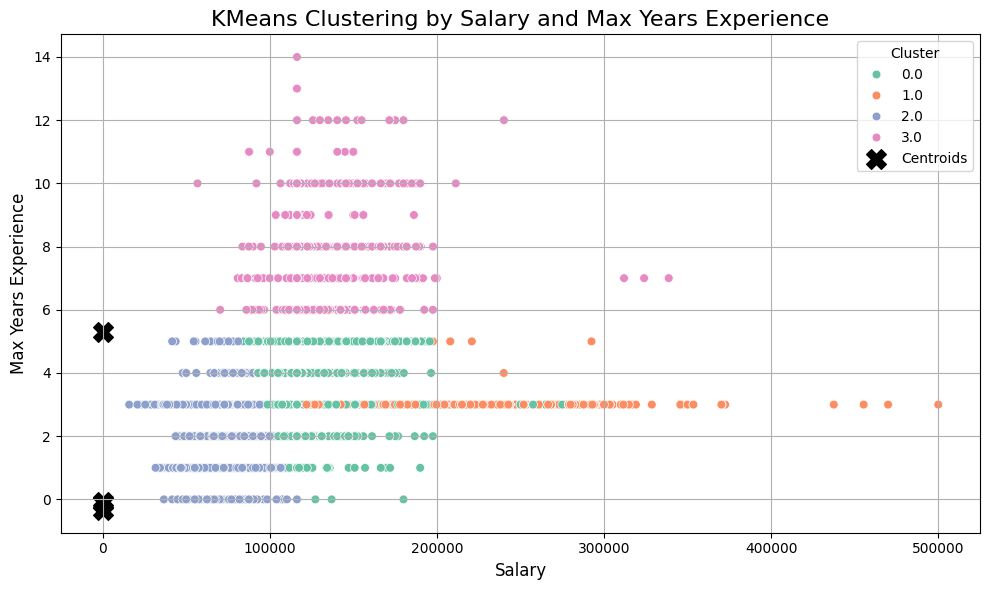

In [13]:
plt.figure(figsize=(10, 6))

# Scatter plot of salary vs. max experience, colored by cluster
sns.scatterplot(
    x=features['SALARY'],
    y=features['MAX_YEARS_EXPERIENCE'],
    hue=eda.loc[features.index, 'Cluster'],
    palette='Set2',
    s=40,
    edgecolor='white',
    linewidth=0.5
)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0] * X.std(axis=0)[0] + X.mean(axis=0)[0],
    centroids[:, 1] * X.std(axis=0)[1] + X.mean(axis=0)[1],
    marker='X',
    s=200,
    c='black',
    label='Centroids'
)

# Titles and labels
plt.title("KMeans Clustering by Salary and Max Years Experience", fontsize=16)
plt.xlabel("Salary", fontsize=12)
plt.ylabel("Max Years Experience", fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

Here we have 4 cluster groups. Group 0, which represent as green have lower salary, mostly under 150k, and max years experience in 2-5 years, it is likely Likely junior to mid-level employees with moderate pay. Group 1 with orange, has medium to high salary, wide range from $100k–$500k and with narrow range ~3 years, they are suggests specialized or high-paying roles with short experience — possibly fast-track promotions or high-demand fields. cluster 2 are low salary and experience from 0-4 years, they are clearly entry level employee. cluster 3 has medium salary, mostly under 200k with higher experiences, like 6-13 eyars. They probably are senior professionals with more experience but not the highest salaries. 


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

features1 = eda[['MIN_YEARS_EXPERIENCE', 'MAX_YEARS_EXPERIENCE']].copy()

for col in features.columns:
    features[col] = pd.to_numeric(features[col], errors='coerce')

features = features.dropna()

X = features
y = eda.loc[X.index, 'SALARY']

X = X.dropna()
y = y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=688)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Model Coefficients: [ 1.00000000e+00 -2.66708857e-13 -1.16044382e-13]
Model Intercept: 2.939486876130104e-09
Mean Squared Error: 5.6317966258366375e-19
R-squared: 1.0


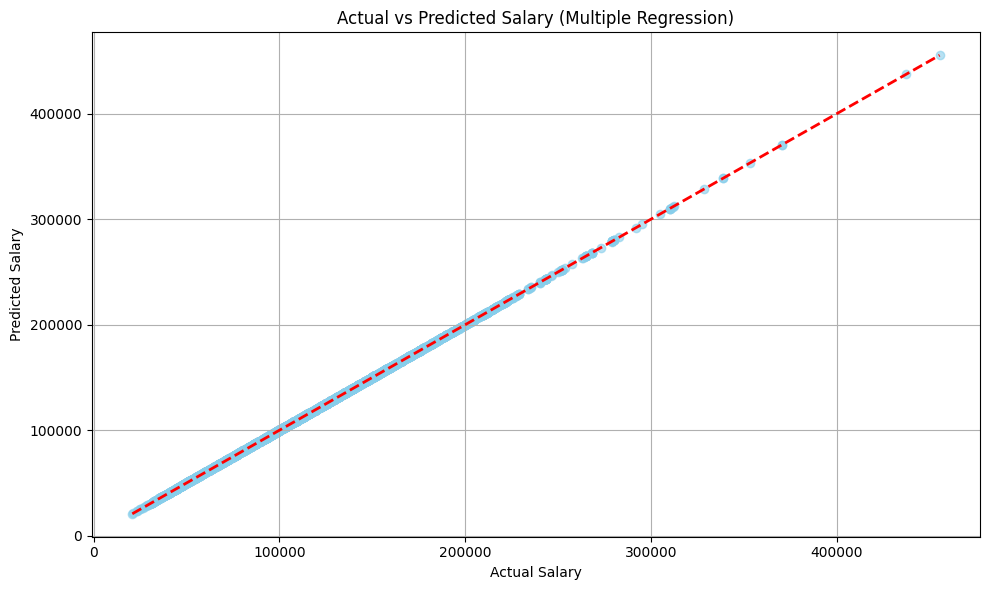

In [15]:
plt.figure(figsize =(10,6))
plt.scatter(y_test, y_pred, alpha = 0.6, color = 'skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (Multiple Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

This plot shows the Actual vs. Predicted Salary using a multiple linear regression model. The blue dots represent individual predictions, and the red dashed line is the ideal line where predicted = actual. Since most points lie very close to the red line, it means your model predicts salary very accurately, with minimal error and strong linear fit — likely reflected in a high R² score near 1.0.